In [4]:
!pip install nibabel



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Checkerboard

# Constant value padding

In [5]:
import nibabel as nib
import torch
import torch.nn.functional as F

# Load the .nii.gz file
nii_path = "C:/Users/shahi/OneDrive/Documents/NAAMI/test_dataset/test_dataset/checkerboard/image/checkerboard.nii.gz"
nii = nib.load(nii_path)

# Convert to numpy and then to PyTorch tensor
image_np = nii.get_fdata()
image_tensor = torch.tensor(image_np, dtype=torch.float32)

print("Original shape:", image_tensor.shape)  # Typically (D, H, W)

# Add batch and channel dimensions if needed: (N, C, D, H, W)
image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)  # Now shape: (1, 1, D, H, W)

# Apply constant value padding (e.g., 10 voxels on all sides)
# Padding format in 3D: (W_left, W_right, H_top, H_bottom, D_front, D_back)
padding = (10, 10, 10, 10, 10, 10)
padded_tensor = F.pad(image_tensor, padding, mode='constant', value=100)

print("Padded shape:", padded_tensor.shape)


Original shape: torch.Size([64, 64, 64])
Padded shape: torch.Size([1, 1, 84, 84, 84])


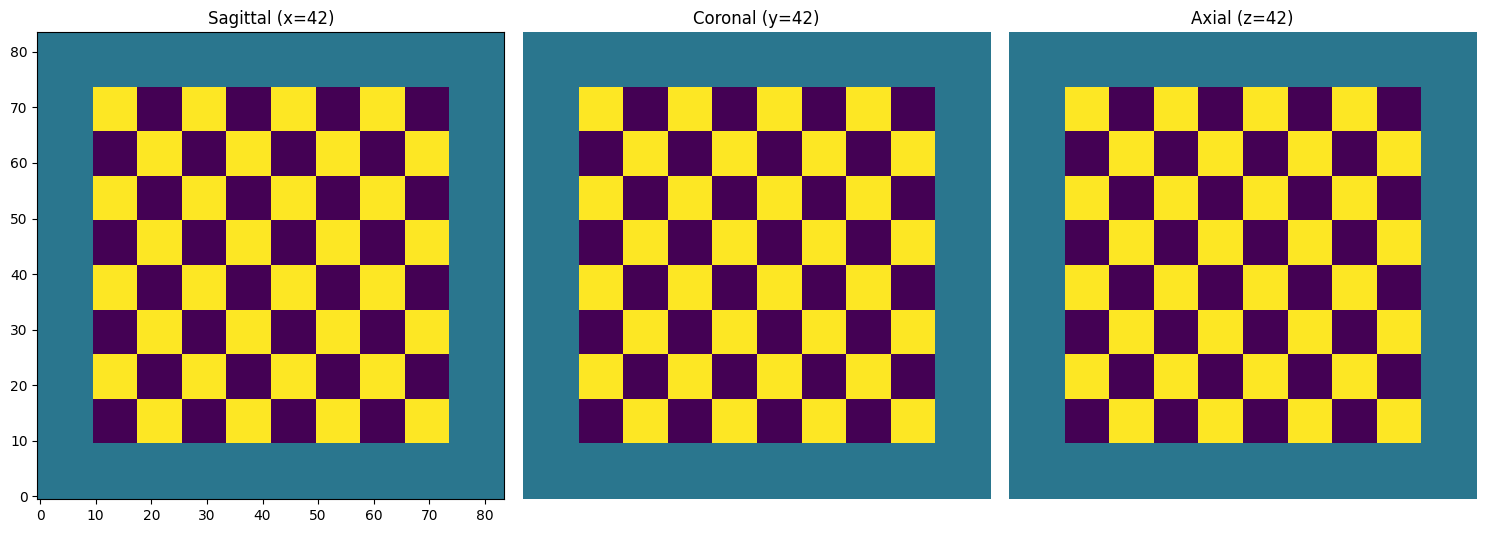

In [6]:
import matplotlib.pyplot as plt

# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import nibabel as nib

def pad_nifti(input_path: str,
              output_path: str,
              pad_width: tuple,
              constant_value: float = 0):
    """
    Load a .nii file, pad it with a constant, and save the result.
    """
    # 1. Load the original NIfTI
    img  = nib.load(input_path)
    data = img.get_fdata()

    # 2. Pad the volume directly
    padded_data = np.pad(
        data,
        pad_width=pad_width,
        mode='constant',
        constant_values=constant_value
    )

    # 3. Wrap & preserve spatial metadata
    padded_img = nib.Nifti1Image(padded_data, img.affine, img.header)

    # 4. Save to disk
    nib.save(padded_img, output_path)
    print(f"Padded image written to: {output_path}")


if __name__ == "__main__":
    input_path  =  "C:/Users/shahi/OneDrive/Documents/NAAMI/test_dataset/test_dataset/checkerboard/image/checkerboard.nii.gz"
    output_path = "C:/Users/shahi/OneDrive/Documents/NAAMI/test_dataset/test_dataset/checkerboard/image/meancheckerboard.nii.gz"

   
    pad_width = ((5, 5), 
                 ( 50,  5), 
                 ( 5,  5)) 

    constant_value = 10  

   
    pad_nifti(input_path, output_path, pad_width, constant_value)



Padded image written to: C:/Users/shahi/OneDrive/Documents/NAAMI/test_dataset/test_dataset/checkerboard/image/meancheckerboard.nii.gz


# Nearest‐value (replicate) padding

In [7]:
padded_tensor = F.pad(image_tensor,
                      padding,
                      mode='replicate')

In [8]:
print("Padded shape:", padded_tensor.shape)

Padded shape: torch.Size([1, 1, 84, 84, 84])


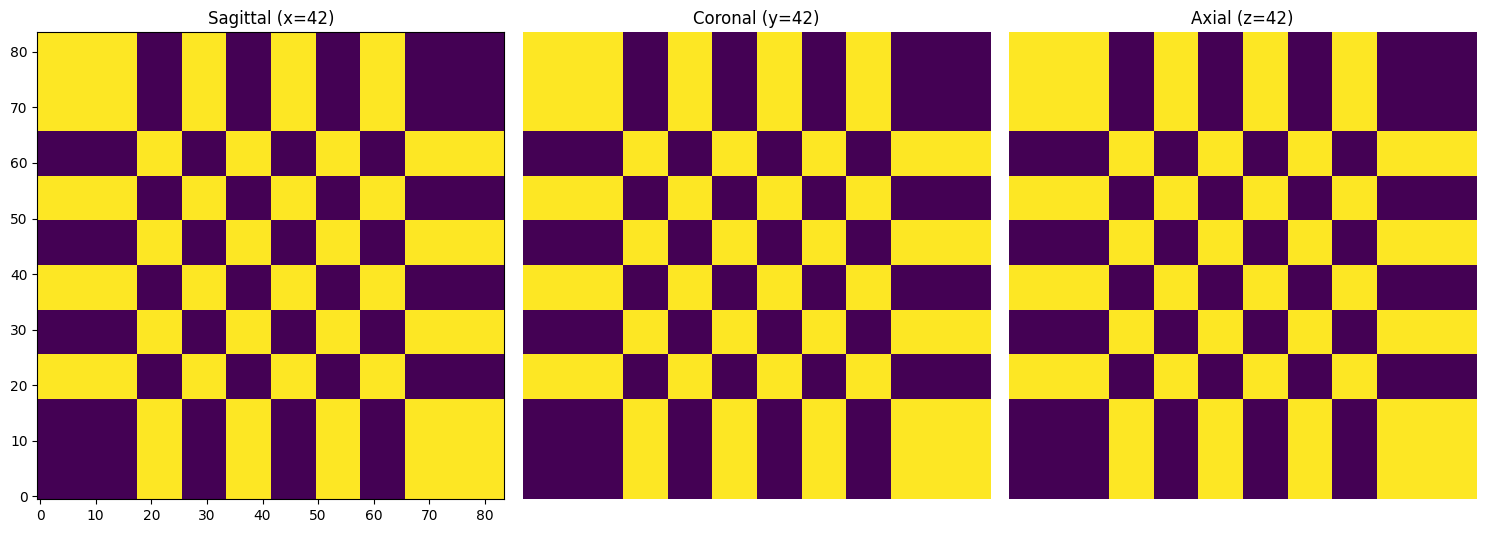

In [9]:
import matplotlib.pyplot as plt

# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Periodisation

In [10]:
padding = (10, 10, 10, 10, 10, 10)

In [11]:
padded_periodic = F.pad(image_tensor, padding, mode='circular')

In [12]:
print("Padded shape:",padded_periodic.shape)

Padded shape: torch.Size([1, 1, 84, 84, 84])


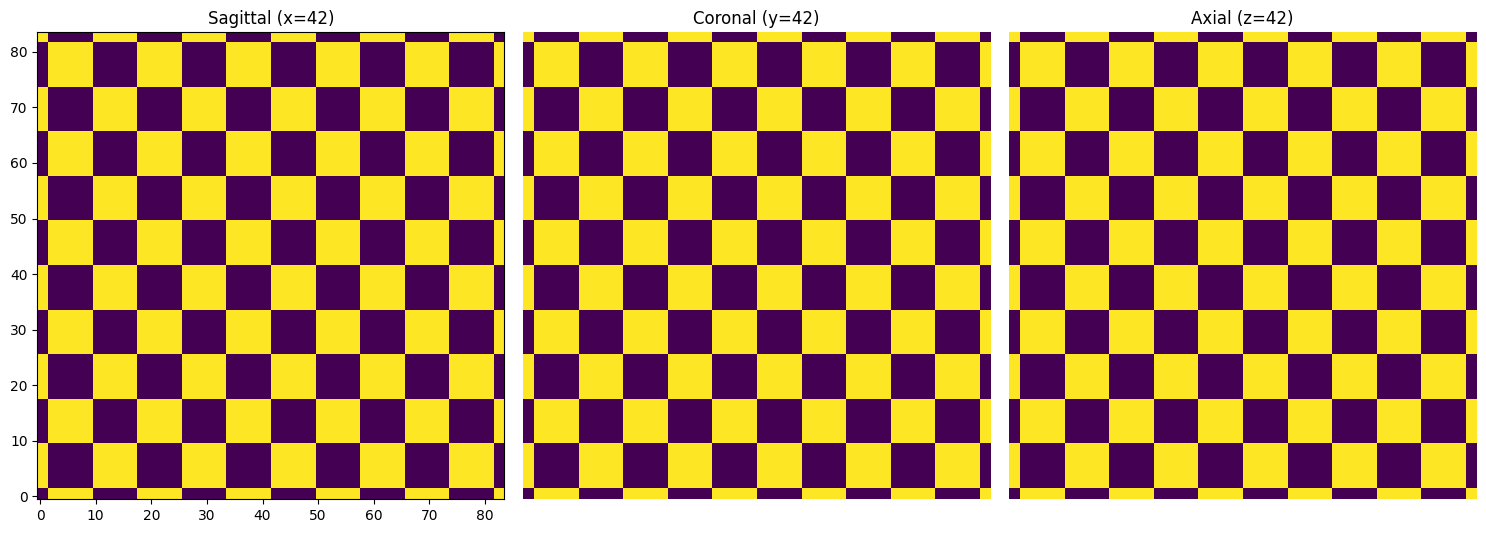

In [13]:
# Convert to a NumPy 3D array
vol = padded_periodic.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Mirror Padding

In [14]:


padded_tensor = F.pad(
    image_tensor,
    padding,
    mode='reflect'   # <-- mirror padding in PyTorch
)



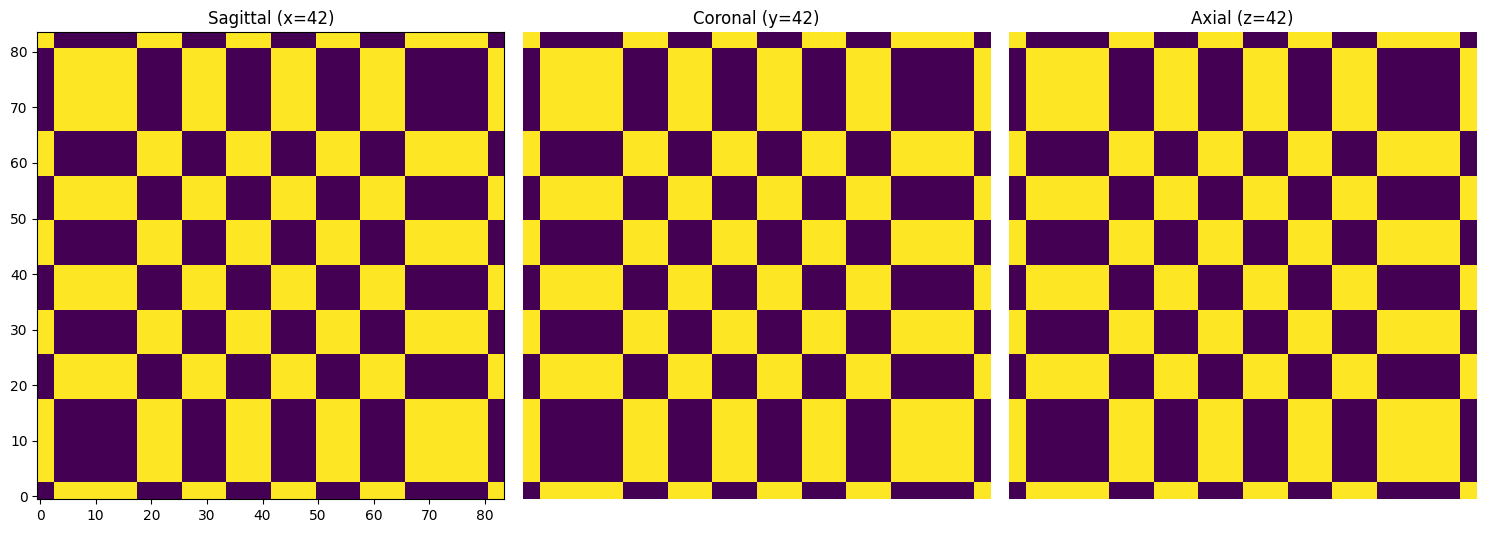

In [15]:
# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


# Sphere

# Constant value padding

In [16]:
import nibabel as nib
import torch
import torch.nn.functional as F

# Load the .nii.gz file
nii_path = "C:/Users/shahi/OneDrive/Documents/NAAMI/test_dataset/test_dataset/sphere/image/sphere.nii.gz"
nii = nib.load(nii_path)

# Convert to numpy and then to PyTorch tensor
image_np = nii.get_fdata()
image_tensor = torch.tensor(image_np, dtype=torch.float32)

print("Original shape:", image_tensor.shape)  # Typically (D, H, W)

# Add batch and channel dimensions if needed: (N, C, D, H, W)
image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)  # Now shape: (1, 1, D, H, W)

# Apply constant value padding (e.g., 10 voxels on all sides)
# Padding format in 3D: (W_left, W_right, H_top, H_bottom, D_front, D_back)
padding = (10, 10, 10, 10, 10, 10)
padded_tensor = F.pad(image_tensor, padding, mode='constant', value=100)

print("Padded shape:", padded_tensor.shape)

Original shape: torch.Size([64, 64, 64])
Padded shape: torch.Size([1, 1, 84, 84, 84])


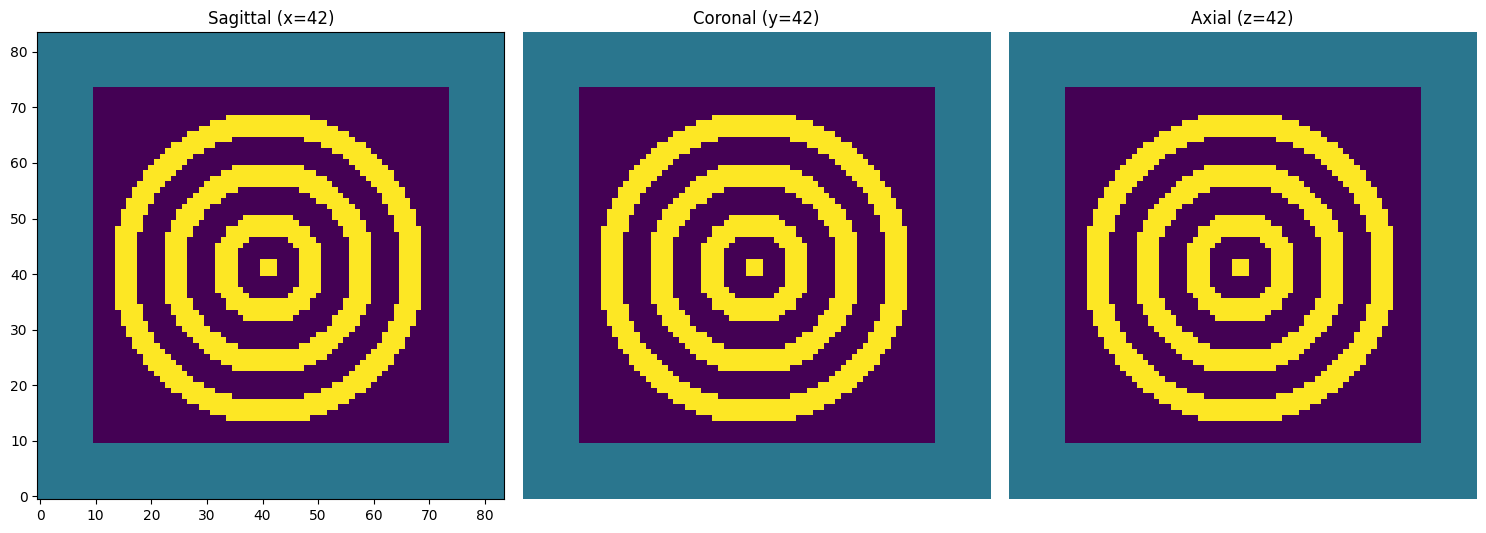

In [17]:
import matplotlib.pyplot as plt

# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


In [ ]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


# Nearest‐value (replicate) padding

In [18]:
padded_tensor = F.pad(image_tensor,
                      padding,
                      mode='replicate')

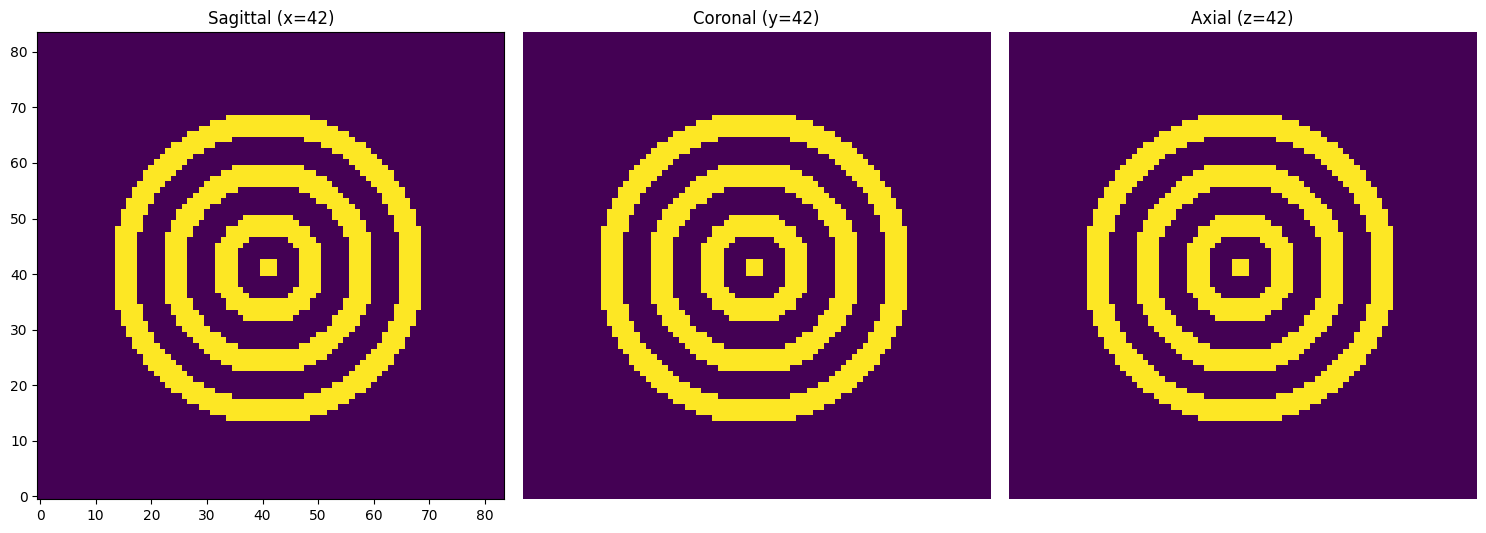

In [19]:
import matplotlib.pyplot as plt

# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


# Periodisation

In [20]:
padded_periodic = F.pad(image_tensor, padding, mode='circular')

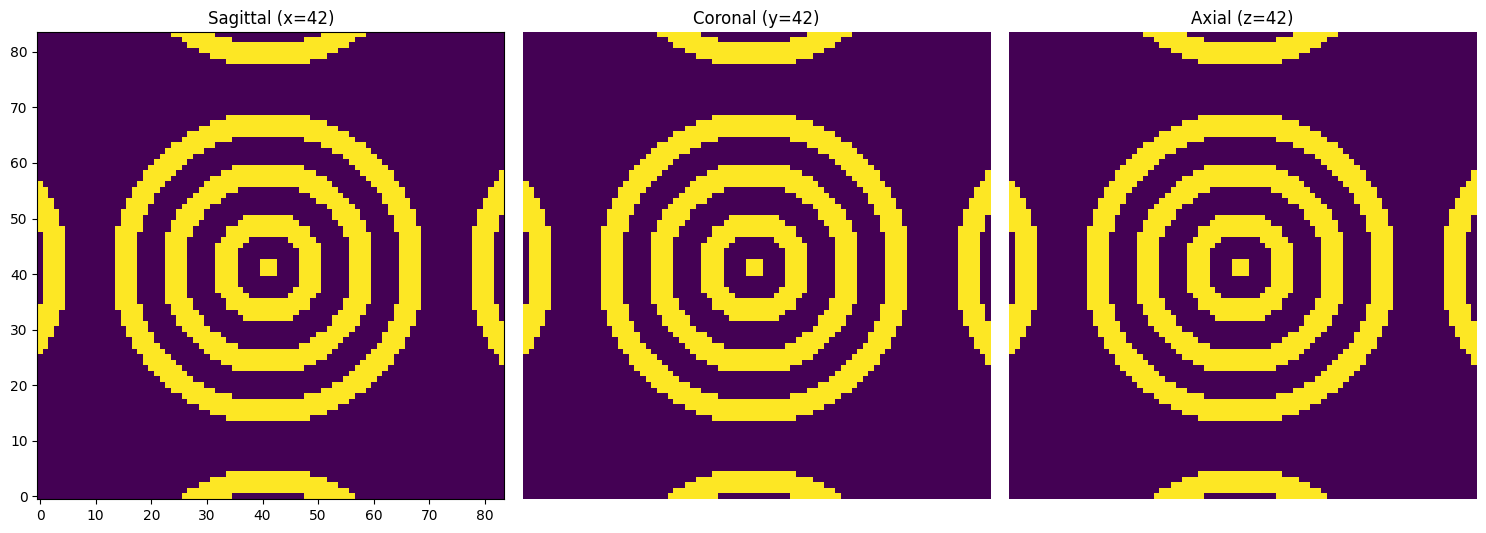

In [21]:
import matplotlib.pyplot as plt

# Convert to a NumPy 3D array
vol = padded_periodic.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pywt
import nibabel as nib
import numpy as np
import itertools
from pathlib import Path

# ════════════════════════════════════════════════════════
#                            CONFIG
# ════════════════════════════════════════════════════════
CONFIG = {
    "IMG_PATH"         : r"C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\checkerboard.nii",
    "ID_TAG"           : "7_a_1",   # "7_a_1" or "7_a_2"
    "WAVELET"          : "haar",    # Haar wavelet
    "LEVEL"            : 2,         # second‐level coefficients
    "SUBBAND"          : "aaa",     # "aaa"=LLL for 7.a.1, "ddd"=HHH for 7.a.2
    "DO_MAXPOOL"       : True      # False for 7.a.1, True for 7.a.2
}
# ════════════════════════════════════════════════════════

# 1. Load the checkerboard volume
nii   = nib.load(CONFIG["IMG_PATH"])
data  = nii.get_fdata().astype(np.float32)
aff   = nii.affine

# 2. Undecimated 3-D wavelet transform (stationary; uses periodic padding)
coeffs_list = pywt.swtn(data,
                       wavelet=CONFIG["WAVELET"],
                       level=CONFIG["LEVEL"],
                       axes=(0,1,2))
# pick the second‐level dict (index 1, since Python is 0-based)
coeffs = coeffs_list[CONFIG["LEVEL"] - 1]

# 3. Extract or average subbands for rotation invariance
if not CONFIG["DO_MAXPOOL"]:
    # single‐subband map
    resp = coeffs[CONFIG["SUBBAND"]]
else:
    # rotation‐invariant: average all permutations of the letters
    toks   = list(CONFIG["SUBBAND"])
    perms  = set(itertools.permutations(toks))
    maps   = [coeffs[''.join(p)] for p in perms]
    resp   = sum(maps) / len(maps)

# 4. Save the result
out_dir = Path(CONFIG["IMG_PATH"]).parent / "udwt_single_outputs"
out_dir.mkdir(exist_ok=True)
suffix  = "ri" if CONFIG["DO_MAXPOOL"] else "resp"
out_fn  = f"{CONFIG['ID_TAG']}_{CONFIG['WAVELET']}_{CONFIG['SUBBAND']}_{suffix}.nii.gz"
out_p   = out_dir / out_fn

nib.save(nib.Nifti1Image(resp, aff), str(out_p))
print(f"✓ {CONFIG['ID_TAG']} saved → {out_p}")


✓ 7_a_1 saved → C:\Users\shahi\OneDrive\Documents\NAAMI\Padding and Filtering implementation\test_dataset\test_dataset\checkerboard\image\checkerboard.nii\udwt_single_outputs\7_a_1_haar_aaa_ri.nii.gz


# Mirror Padding

In [22]:


padded_tensor = F.pad(
    image_tensor,
    padding,
    mode='reflect'   # <-- mirror padding in PyTorch
)



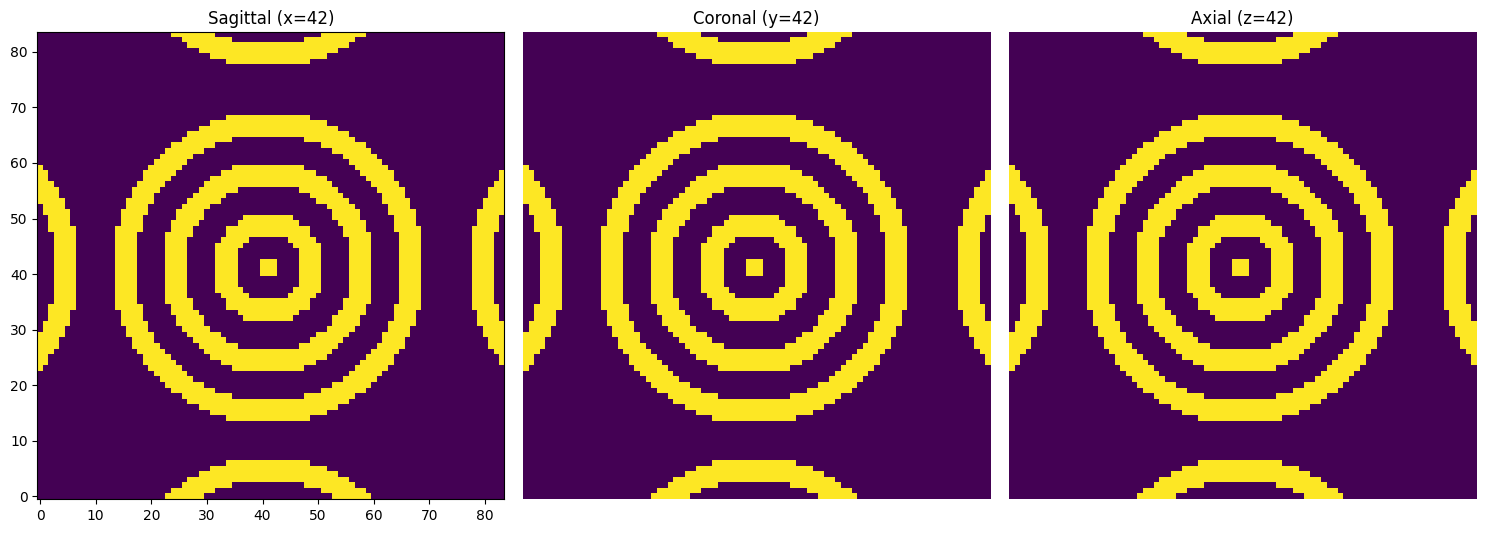

In [23]:
# Convert to a NumPy 3D array
vol = padded_tensor.squeeze().cpu().numpy()    # shape (84,84,84)

# Compute the center indices
d_mid, h_mid, w_mid = [s // 2 for s in vol.shape]

# Extract orthogonal slices
sagittal = vol[:, :, w_mid]   # Y–Z at middle X
coronal  = vol[:, h_mid, :]   # X–Z at middle Y
axial    = vol[d_mid, :, :]   # X–Y at middle Z

# Plot them side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(sagittal.T, origin='lower')
axes[0].set_title(f'Sagittal (x={w_mid})')
axes[0].axis('on')

axes[1].imshow(coronal.T, origin='lower')
axes[1].set_title(f'Coronal (y={h_mid})')
axes[1].axis('off')

axes[2].imshow(axial, origin='lower')
axes[2].set_title(f'Axial (z={d_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()